In [1]:
!export PYTHONPATH=PYTONPATH:/opt/project/sandbox_1

In [2]:
import tensorflow as tf
from model import YoloV1
from config import dict2namedtuple
from yolo_config import CFG
import numpy as np

from data_load.data_loader import DataLoader
from data import YoloData

In [3]:
def draw_predicted_bbox(preds, imgs):
    for img, pred in zip(imgs, preds):
        img = np.array(img, dtype=np.int32)
        pred = np.array(pred, dtype=np.float32)

        h, w = img.shape[:2]
        S = pred.shape[0]

        for y in range(S):
            for x in range(S):
                data = pred[y, x]
                if data[4] > data[9]:
                    cx, cy, bw, bh = data[:4]
                    C = data[4]
                    color = (255, 0, 0)
                else:
                    cx, cy, bw, bh = data[5:9]
                    C = data[9]
                    color = (0, 255, 0)

                bw, bh = bw**2, bh**2
                cx = int((cx+x)/S * w)
                cy = int((cy+y)/S * h)
                bw = int(bw*w)
                bh = int(bh*h)

                if C > .5:
                    img = cv2.rectangle(img,
                                        (cx-bw//2, cy-bh//2), (cx+bw//2, cy+bh//2),
                                        color, int(5*C))

        plt.imshow(img)
        plt.show()

In [4]:
params = dict2namedtuple(CFG)

In [5]:
model = YoloV1(params)

In [6]:
model.load_weights('model_save/yolo_v1_120000')

In [7]:
import cv2
import matplotlib.pyplot as plt

In [8]:
dog = cv2.imread('dog.jpeg')[..., ::-1]
dog_norm = cv2.resize(dog, (448, 448)).astype(np.float32)

In [9]:
result = model(dog_norm[None, ...])

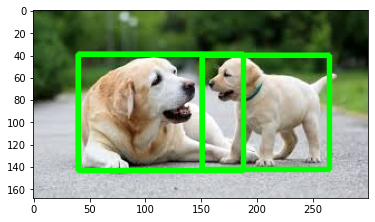

In [10]:
draw_predicted_bbox(result, dog[None, ...])

In [11]:
data_loader = DataLoader(params)
yolo_data = YoloData(params)
# train_ds = data_loader.set_ds(yolo_data.map_fn_train, training=True)
eval_ds = data_loader.set_ds(yolo_data.map_fn_eval, training=False)

In [ ]:
for i, (x, y) in enumerate(eval_ds):
    if i >= 3:
        break
    preds = model(x)
    draw_predicted_bbox(preds, x)

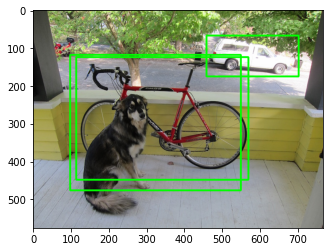

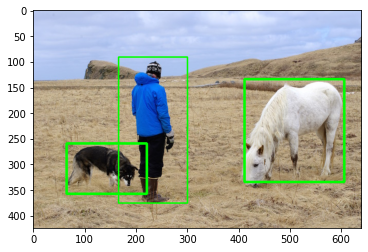

In [17]:
path = '/opt/project/sandbox_1/img/'
for fname in ['dog.jpg', 'person.jpg']:
    img = cv2.imread(path+fname)[..., ::-1]
    img_resize = cv2.resize(img, (448, 448)).astype(np.float32)
    result = model(img_resize[None, ...])
    draw_predicted_bbox(result, img[None, ...])